# Study day 1

### Data load & setting

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import mglearn

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
#붓꽃 품종 분류 데이터 load
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [8]:
#fearture 이름 확인
print("iris_data_set_feature_name: \n{}".format(iris_dataset['feature_names']))

iris_data_set_feature_name: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
#label 이름 확인
print("iris_data_set_target_name: \n{}".format(iris_dataset['target_names']))

iris_data_set_target_name: 
['setosa' 'versicolor' 'virginica']


In [10]:
#데이터 크기 확인
print("iris_data_set_size: \n{}".format(iris_dataset['data'].shape))

iris_data_set_size: 
(150, 4)


In [11]:
#head 5 줄 확인
print("iris_data_set_head5: \n{}".format(iris_dataset['data'][:5]))

iris_data_set_head5: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [12]:
#label 데이터 타입 확인
print("iris_data_set_type \n{}".format(type(iris_dataset['target'])))

iris_data_set_type 
<class 'numpy.ndarray'>


In [25]:
#test set, training set 나누기
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'], test_size=0.3, random_state=0)

In [28]:
#나눠진 데이터 셋 확인
print("x_train_size: \n{}".format(X_train.shape))
print("y_train_size: \n{}".format(y_train.shape))

print("x_test_size: \n{}".format(X_test.shape))
print("y_test_size: \n{}".format(y_test.shape))

x_train_size: 
(105, 4)
y_train_size: 
(105,)
x_test_size: 
(45, 4)
y_test_size: 
(45,)


### EDA

In [41]:
#X_train으로 dataframe 만들기
iris_df = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c22c99e50>,
      dtype=object)

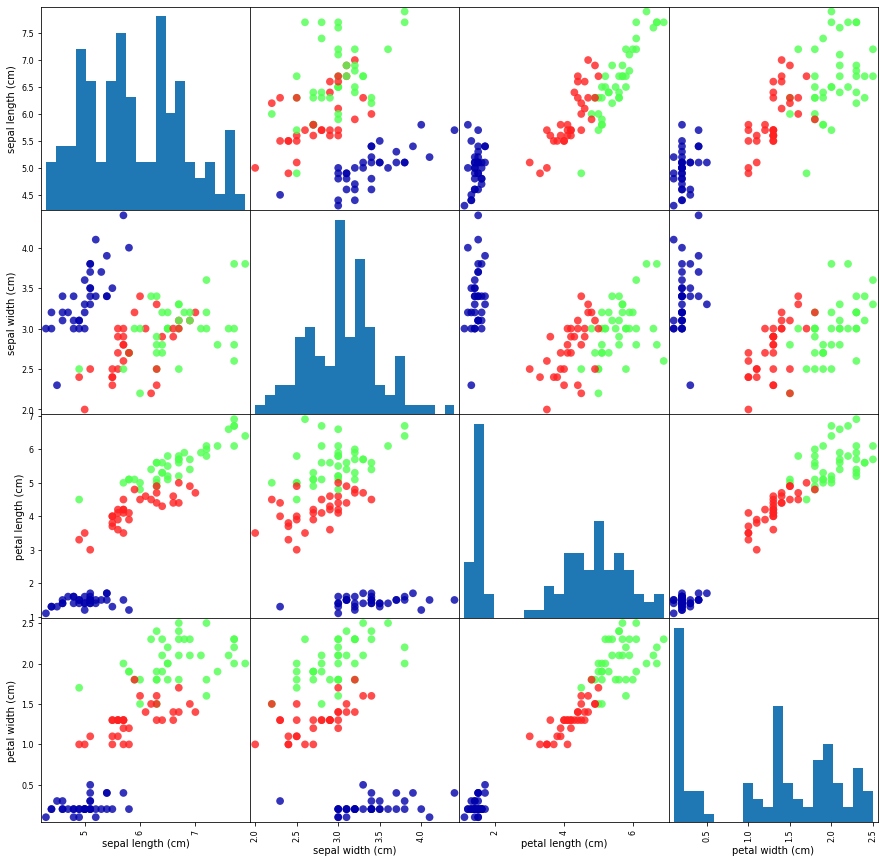

In [50]:
#xtrain 데이터의 ytrain별 색을 다르게 한 동그란 산점도 행렬 만들기
pd.plotting.scatter_matrix(iris_df, c=y_train, figsize =(15,15), marker ='o', hist_kwds={'bins':20}, s=60, alpha=0.8, cmap=mglearn.cm3)

# Study day 2

### KNN

In [51]:
#KNN 불러오기
from sklearn.neighbors import KNeighborsClassifier

In [52]:
#K=1
knn=KNeighborsClassifier(n_neighbors=1)

In [53]:
#모델 피팅
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [54]:
#예측할 샘플만들기
X_new = np.array([[5,2.9,1,0.2]])

In [59]:
#prediction
knn_pred = knn.predict(X_new)
print(iris_dataset['target_names'][knn_pred])

['setosa']


In [65]:
#evaluation
y_pred=knn.predict(X_test)
print("pred_lables: \n{}".format(iris_dataset['target_names'][y_pred]))
print("pred_accuracy: \n{}".format(np.mean(y_pred == y_test)))

pred_lables: 
['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'versicolor' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa' 'virginica'
 'setosa' 'setosa']
pred_accuracy: 
0.9777777777777777


### Supervised learning

#### Data load

In [67]:
#맷플롯립 임포트
import matplotlib.pyplot as plt

Text(0, 0.5, 'second feature')

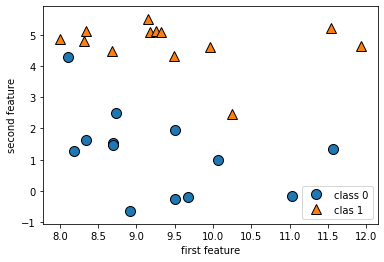

In [71]:
#data set 만들기
X, y = mglearn.datasets.make_forge()
#scatter plot
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["class 0", "clas 1"], loc =4)
plt.xlabel("first feature")
plt.ylabel("second feature")

Text(0, 0.5, 'target')

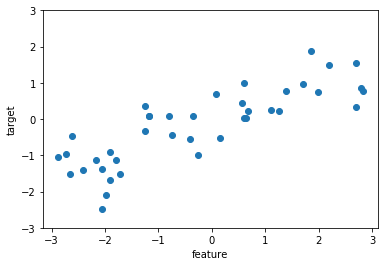

In [72]:
#data set 만들기 2
X, y = mglearn.datasets.make_wave(n_samples =40)
plt.plot(X,y, 'o')
plt.ylim(-3,3)
plt.xlabel("feature")
plt.ylabel("target")

In [73]:
# data set 가져오기 1
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
#클래스별 샘플 수 보기
print("the number of sample by class: \n{}".format({n: v for n , v in zip(cancer.target_names, np.bincount(cancer.target))}))

the number of sample by class: 
{'malignant': 212, 'benign': 357}


In [74]:
# data set 가져오기 2
from sklearn.datasets import load_boston
boston=load_boston()
X, y =mglearn.datasets.load_extended_boston()

#### KNN

In [79]:
from sklearn.datasets.samples_generator import make_blobs

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


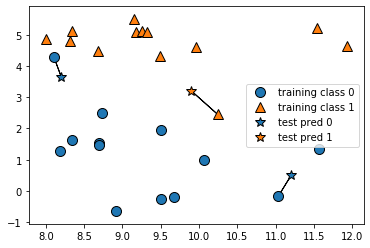

In [80]:
#knn 으로 예측하기 (k=1)
mglearn.plots.plot_knn_classification(n_neighbors=1)

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


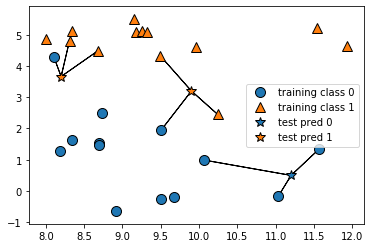

In [81]:
#knn 으로 예측하기 (k=3)
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [89]:
#test training set 나누기
X, y =mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [91]:
#classification
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [92]:
#prediction & evaluation
print("pred_lables: \n{}".format(clf.predict(X_test)))
print("pred_accuracy: \n{}".format(clf.score(X_test, y_test)))

pred_lables: 
[1 0 1 0 1 0 0]
pred_accuracy: 
0.8571428571428571


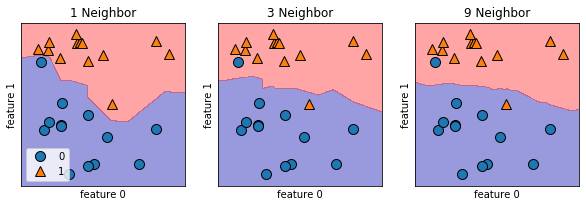

In [95]:
#K가 1, 3, 9 일때 차트로 그려서 classification 시각화
fig, axes = plt.subplots(1,3, figsize =(10,3))

for n_neighbors, ax in zip ([1,3,9], axes): 
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} Neighbor".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

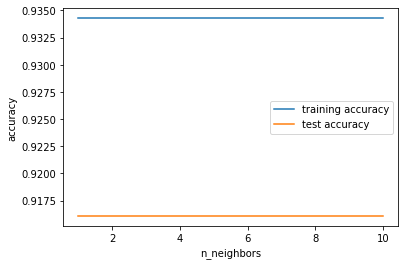

In [119]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11) #1~10 K 적용

for n_neghbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))

plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.legend()